<a href="https://colab.research.google.com/github/wang0324/Algorithmic-Bias/blob/master/Visualize_Cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# IMPORTANT! Make sure to add the "Angelo Lab Research" Folder to your Drive
df = pd.read_csv('gdrive/My Drive/Angelo Lab Research/Data/granA_cellpheno_CS-asinh-norm_revised.csv')

df.head()

TypeError: ignored

In [ ]:
numrows = df.count()
print(numrows+1)

SampleID            55713
cellLabelInImage    55713
cellSize            55713
C                   55713
Na                  55713
Si                  55713
HH3                 55713
Vimentin            55713
SMA                 55713
Background          55713
Collagen.1          55713
Lag3                55713
CD4                 55713
CD14                55713
Foxp3               55713
PD.1                55713
CD31                55713
PD.L1               55713
E.cadherin          55713
Ki67                55713
CD209               55713
CD206               55713
gdTCR               55713
iNOS                55713
CD68                55713
CD36                55713
CD8                 55713
CD3                 55713
IDO                 55713
CD11c               55713
CD163               55713
CD20                55713
CD16                55713
IFNg                55713
HLA.DR.DQ.DP        55713
CD11b               55713
CD45                55713
H3K9Ac              55713
Keratin.pan 

In [ ]:
cell_names = df["cell_type"].value_counts().index
cell_names = cell_names.tolist()
print(cell_names)
print(len(cell_names))

['CD4_T', 'CD14_Mono', 'CD8_T', 'B_cell', 'CD11b/c_CD206_Mac/Mono', 'CD11c_DC/Mono', 'CD16_CD14_Mono', 'imm_other', 'endothelial', 'CD68_Mac', 'CD206_Mac', 'fibroblast', 'epithelial', 'neutrophil', 'CD209_DC', 'CD163_Mac', 'mast', 'Treg', 'gdT_cell', 'giant_cell']
20


Text(0.5, 1.0, 'Distribution of Cell Count in Patients')

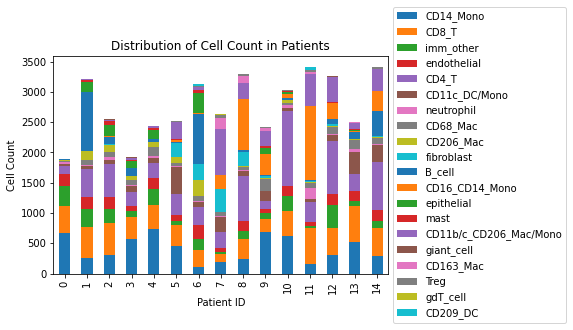

In [ ]:
#For each Patient, find number of cells
ids = set(df["PatientID"])
unique_ids = []
for item in ids:
  if type(item) is float:
    unique_ids.append(item)

unique_ids = [x for x in unique_ids if x == x]

def newDict(cell_names):
  result = {}
  for name in cell_names:
    result[name] = [0]
  return result

df_stacked = pd.DataFrame(newDict(cell_names))
#dictionary = newDict(cell_names)

#df_append = pd.DataFrame(newDict(cell_names))

#df_stacked.append(df_append)

#print(df_stacked)


first = True
nums=1
for id in unique_ids:

  df_rows = df.loc[df["PatientID"] == id]
  row_cell_types = df_rows["cell_type"].value_counts()

  if first:
    df_stacked = pd.DataFrame([row_cell_types.values], columns=row_cell_types.index)
    first = False
  else:
    df_stacked = pd.concat([df_stacked, (pd.DataFrame([row_cell_types.values], columns=row_cell_types.index))], axis=0, ignore_index=True)
   # print(nums)
  nums+=1


df_stacked.plot.bar(stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Patient ID")
plt.ylabel("Cell Count")
plt.title("Distribution of Cell Count in Patients")

Text(0.5, 1.0, 'Distribution of Cell Count Proportion in Patients')

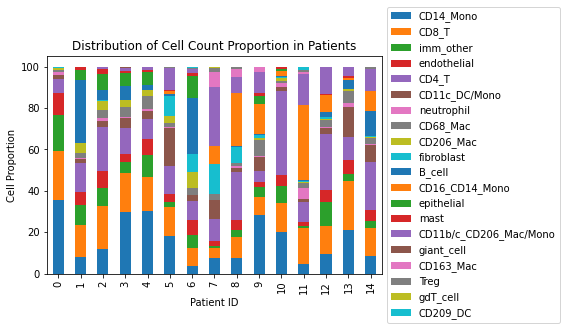

In [ ]:
#For each Patient, find number of cells
ids = set(df["PatientID"])
unique_ids = []
for item in ids:
  if type(item) is float:
    unique_ids.append(item)

unique_ids = [x for x in unique_ids if x == x]

def newDict(cell_names):
  result = {}
  for name in cell_names:
    result[name] = [0]
  return result

df_stacked = pd.DataFrame(newDict(cell_names))
#dictionary = newDict(cell_names)

#df_append = pd.DataFrame(newDict(cell_names))

#df_stacked.append(df_append)

#print(df_stacked)


first = True
nums=1
for id in unique_ids:

  df_rows = df.loc[df["PatientID"] == id]
  row_cell_types = df_rows["cell_type"].value_counts(normalize=True)*100

  if first:
    df_stacked = pd.DataFrame([row_cell_types.values], columns=row_cell_types.index)
    first = False
  else:
    df_stacked = pd.concat([df_stacked, (pd.DataFrame([row_cell_types.values], columns=row_cell_types.index))], axis=0, ignore_index=True)
   # print(nums)
  nums+=1


df_stacked.plot.bar(stacked=True, legend = False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Patient ID")
plt.ylabel("Cell Proportion")
plt.title("Distribution of Cell Count Proportion in Patients")

In [ ]:
#For each Patient, find number of cells
ids = set(df["PatientID"])
unique_ids = []
for item in ids:
  if type(item) is float:
    
    unique_ids.append(item)

unique_ids = [x for x in unique_ids if x == x]
print(unique_ids)

df_stacked = pd.DataFrame()

first = True
nums=1
for id in unique_ids:
  df_rows = df.loc[df["PatientID"] == id]
  row_cell_types = df_rows["cell_type"].value_counts()
  print(type([row_cell_types.index]))
  print([row_cell_types.index])
  if first:
    print("first")
    df_stacked = pd.DataFrame([row_cell_types.values], columns = row_cell_types.index)
    first = False
  else:
    #print(row_cell_types)
    #add_df = pd.DataFrame([row_cell_types.values], columns = row_cell_types.index)
    df_stacked.append(add_df)


  nums+=1



df_stacked

[1.0, 2.0, 3.0, 4.0, 11.0, 12.0, 17.0, 18.0, 20.0, 21.0, 23.0, 29.0, 30.0, 34.0, 31.0]
<class 'list'>
[Index(['CD14_Mono', 'CD8_T', 'imm_other', 'endothelial', 'CD4_T',
       'CD11c_DC/Mono', 'neutrophil', 'CD68_Mac', 'CD206_Mac', 'fibroblast',
       'B_cell', 'CD16_CD14_Mono'],
      dtype='object')]
first
<class 'list'>
[Index(['B_cell', 'CD8_T', 'CD4_T', 'imm_other', 'CD14_Mono', 'endothelial',
       'epithelial', 'CD206_Mac', 'CD68_Mac', 'CD11c_DC/Mono', 'mast',
       'neutrophil', 'CD11b/c_CD206_Mac/Mono', 'giant_cell', 'fibroblast'],
      dtype='object')]
<class 'list'>
[Index(['CD4_T', 'CD8_T', 'CD14_Mono', 'imm_other', 'endothelial', 'epithelial',
       'B_cell', 'CD206_Mac', 'CD68_Mac', 'CD11c_DC/Mono', 'mast',
       'neutrophil', 'CD11b/c_CD206_Mac/Mono', 'fibroblast', 'giant_cell',
       'CD16_CD14_Mono', 'CD163_Mac', 'Treg', 'gdT_cell'],
      dtype='object')]
<class 'list'>
[Index(['CD14_Mono', 'CD8_T', 'CD4_T', 'B_cell', 'epithelial', 'CD11c_DC/Mono',
       'imm_

,CD14_Mono,CD8_T,imm_other,endothelial,CD4_T,CD11c_DC/Mono,neutrophil,CD68_Mac,CD206_Mac,fibroblast,B_cell,CD16_CD14_Mono
0,672,449,324,201,129,36,33,17,15,5,4,4


In [ ]:
patient_ids = df["PatientID"].value_counts()
patient_ids.sum()

df.loc[df["PatientID"] == 1.0]

,SampleID,cellLabelInImage,cellSize,C,Na,Si,HH3,Vimentin,SMA,Background,Collagen.1,Lag3,CD4,CD14,Foxp3,PD.1,CD31,PD.L1,E.cadherin,Ki67,CD209,CD206,gdTCR,iNOS,CD68,CD36,CD8,CD3,IDO,CD11c,CD163,CD20,CD16,IFNg,HLA.DR.DQ.DP,CD11b,CD45,H3K9Ac,Keratin.pan,CD103,MastChyTry,MPO,NaKATPase,HLA.Class.1,Ta,Au,Tissue,PatientID,lineage,cell_type,cell_lin,lintype_num
33751,64,3,41,0.0,0.902025,0.448598,0.507697,0.631015,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.662386,0.0,0.0,0.000000,0.565938,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.580343,0.312942,0.443076,gran_lung,1.0,immune,imm_other,other,4
33752,64,4,184,0.0,0.886973,0.454619,0.438676,0.622629,0.0,0.090866,0.0,0.0,0.0,0.368429,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.358569,0.142416,0.0,0.0,0.0,0.0,0.000000,0.518860,0.353215,0.000000,0.0,0.0,0.0,0.787859,0.340696,0.590069,0.318355,0.459903,gran_lung,1.0,immune,neutrophil,granulocyte,3
33753,64,8,155,0.0,0.917020,0.979366,0.602476,0.000000,0.0,0.987147,0.0,0.0,0.0,0.252766,0.0,0.0,0.408135,0.300032,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.494385,0.029892,0.0,0.0,0.0,0.0,0.000000,0.000000,0.108987,0.000000,0.0,0.0,0.0,0.000000,0.034656,0.381503,0.222221,0.341840,gran_lung,1.0,endothelial,endothelial,nonimmune,5
33754,64,11,154,0.0,0.889487,0.698260,0.429029,0.000000,0.0,0.210004,0.0,0.0,0.0,0.089645,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.114353,0.000000,0.0,0.0,0.0,0.0,0.000000,0.568721,0.109644,0.000000,0.0,0.0,0.0,0.000000,0.034879,0.413266,0.608899,0.678524,gran_lung,1.0,immune,imm_other,other,4
33755,64,12,155,0.0,0.931851,0.824671,0.342842,0.403899,0.0,0.159232,0.0,0.0,0.0,0.233541,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.525995,0.455614,0.0,0.0,0.0,0.0,0.000000,0.291820,0.388418,0.000000,0.0,0.0,0.0,0.000000,0.266889,0.591914,0.801724,0.802122,gran_lung,1.0,immune,CD14_Mono,myeloid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35635,65,1221,80,0.0,0.904586,0.572018,0.604315,0.230372,0.0,0.652949,0.0,0.0,0.0,0.058321,0.0,0.0,0.000000,0.134615,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.078241,0.795139,0.422438,0.0,0.0,0.0,0.0,0.000000,0.000000,0.432296,0.343542,0.0,0.0,0.0,0.000000,0.417493,0.455946,0.697649,0.690037,gran_lung,1.0,immune,CD14_Mono,myeloid,1
35636,65,1222,81,0.0,0.882645,0.375244,0.428866,0.594022,0.0,0.553952,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.505403,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.328156,0.744790,0.669297,0.0,0.0,0.0,0.0,0.436254,0.662600,0.505864,0.000000,0.0,0.0,0.0,0.640537,0.656498,0.635775,0.288574,0.463317,gran_lung,1.0,immune,neutrophil,granulocyte,3
35637,65,1223,47,0.0,0.882115,0.329727,0.400648,0.373887,0.0,0.631521,0.0,0.0,0.0,0.097484,0.0,0.0,0.000000,0.419412,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.650911,0.577225,0.0,0.0,0.0,0.0,0.391224,0.441513,0.588650,0.328501,0.0,0.0,0.0,0.000000,0.522235,0.595665,0.276249,0.441137,gran_lung,1.0,immune,CD14_Mono,myeloid,1
35638,65,1224,58,0.0,0.908563,0.447721,0.427474,0.464525,0.0,0.680149,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.603088,0.696508,0.0,0.0,0.0,0.0,0.000000,0.601715,0.406990,0.000000,0.0,0.0,0.0,0.457022,0.573025,0.571211,0.316906,0.420981,gran_lung,1.0,immune,CD14_Mono,myeloid,1


<class 'pandas.core.series.Series'>
CD4_T                     10250
CD14_Mono                  7245
CD8_T                      6979
B_cell                     5713
CD11b/c_CD206_Mac/Mono     4414
CD11c_DC/Mono              3824
CD16_CD14_Mono             3371
imm_other                  2996
endothelial                2735
CD68_Mac                   2278
CD206_Mac                  1443
fibroblast                 1281
epithelial                 1106
neutrophil                  560
CD209_DC                    481
CD163_Mac                   414
mast                        314
Treg                        220
gdT_cell                     55
giant_cell                   33
Name: cell_type, dtype: int64


Text(0, 0.5, 'Cell Count')

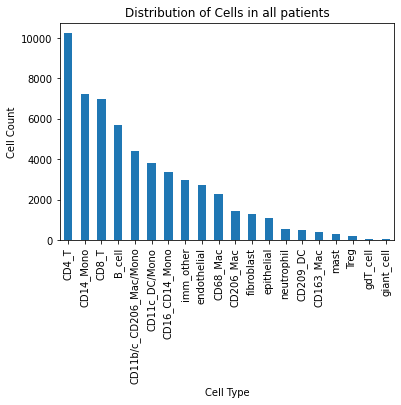

In [ ]:
# Shows Barplot of distribution of all the cells

cell_types = df["cell_type"].value_counts()
print(type(cell_types))
print(cell_types)

cell_types.plot.bar(stacked=True)

plt.title("Distribution of Cells in all patients")
plt.xlabel("Cell Type")
plt.ylabel("Cell Count")


In [ ]:

u_df = df[['PatientID', "cell_type"]]



#u_df.plot(kind='bar', stacked=True)
#plt.legend(loc='upper left')
#plt.show()

In [ ]:
u_df.head()

,PatientID,cell_type
0,30.0,endothelial
1,30.0,endothelial
2,30.0,CD16_CD14_Mono
3,30.0,CD8_T
4,30.0,CD4_T


In [ ]:
pivot_df = df.pivot(index='PatientID', columns='cell_type')
pivot_df.plot.bar(stacked=True)

ValueError: ignored